In [1]:
# Week 1 Homework
# url = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/01-intro/homework.md'

# import the necessary library
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

### Question 1

What's the version of NumPy that you installed? 

You can get the version information using the `__version__` field:

In [2]:
np.__version__

'1.22.3'

### Question 2

How many records are in the dataset?

Here you need to specify the number of rows.


In [3]:
data = pd.read_csv('data.csv')
print(f'The file contains {len(data)} rows:')
data.head()

The file contains 11914 rows:


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# Making the columns uniform in terms of capitalisation and having no spaces in the columns
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [5]:
# Finding categorical variables so that we can standardise the inputs. 
strings = list(data.dtypes[data.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
# Standardising the inputs 
for col in strings:
    data[col] = data[col].str.lower().str.replace(' ', '_')

In [7]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


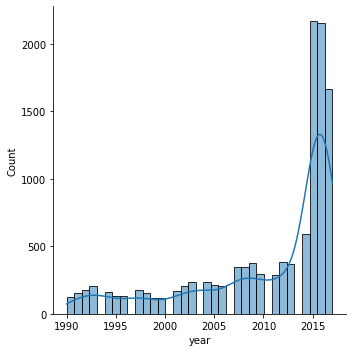

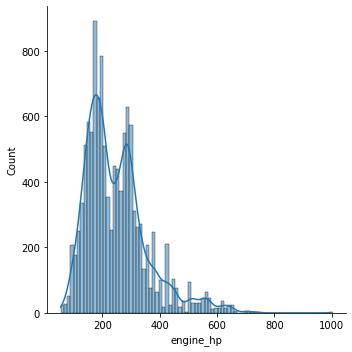

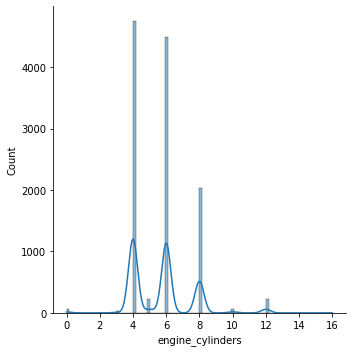

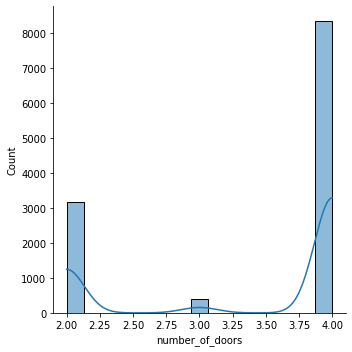

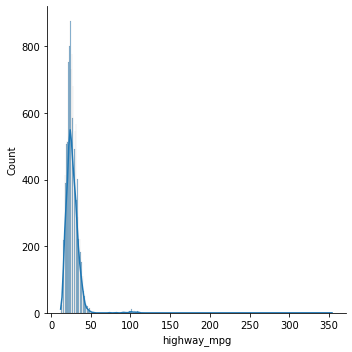

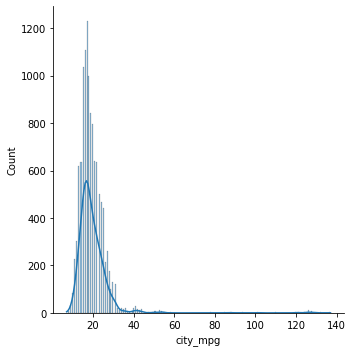

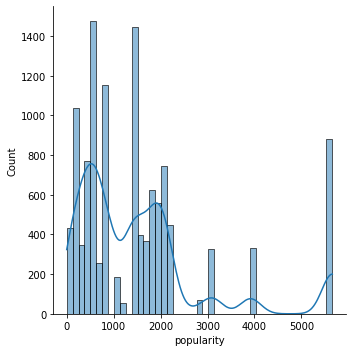

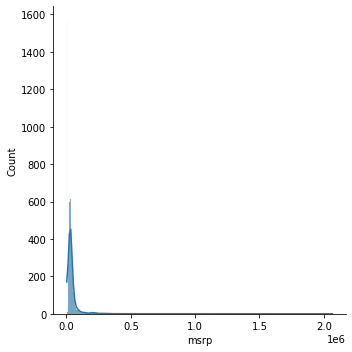

In [8]:
# exploratory visualization for data for numeric data distributions

df_num = data._get_numeric_data()

for i in df_num.columns:
    sns.displot(df_num[i], kde=True)

### Question 3

Who are the most frequent car manufacturers (top-3) according to the dataset?

In [9]:
data['make'].value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

### Question 4

What's the number of unique Audi car models in the dataset?

In [10]:
# create a filtered datagframe by Make - Audi,
# then run a value count on filtered dataframe

data_audi = data[data['make']=='audi']

# data_audi['Model'].value_counts()
data_audi['model'].nunique()

34

### Question 5

How many columns in the dataset have missing values?

In [11]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Question 6

1. Find the median value of "Engine Cylinders" column in the dataset.
2. Next, calculate the most frequent value of the same "Engine Cylinders".
3. Use the `fillna` method to fill the missing values in "Engine Cylinders" with the most frequent value from the previous step.
4. Now, calculate the median value of "Engine Cylinders" once again.

In [13]:
# 1. Find the median value of "Engine Cylinders" column in the dataset.

data['engine_cylinders'].median()

6.0

In [14]:
# 2. Next, calculate the most frequent value of the same "Engine Cylinders".

data['engine_cylinders'].value_counts().idxmax()
# data['Engine Cylinders'].value_counts()

4.0

In [15]:
# check for totals of NA values across DF
data.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [17]:
# 3. Use the `fillna` method to fill the missing values in "Engine Cylinders" with the most frequent value from the previous step.

data["engine_cylinders"].fillna(data['engine_cylinders'].value_counts().idxmax(),inplace=True)

In [18]:
# check your work
data["engine_cylinders"].isna().sum()

0

In [19]:
# ['Engine Cylinders'] now has 11914 non-null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11914 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [20]:
# 4. Now, calculate the median value of "Engine Cylinders" once again.

data["engine_cylinders"].median()

6.0

### Question 7

1. Select all the "Lotus" cars from the dataset.
2. Select only columns "Engine HP", "Engine Cylinders".
3. Now drop all duplicated rows using `drop_duplicates` method (you should get a dataframe with 9 rows).
4. Get the underlying NumPy array. Let's call it `X`.
5. Compute matrix-matrix multiplication between the transpose of `X` and `X`. To get the transpose, use `X.T`. Let's call the result `XTX`.
6. Invert `XTX`.
7. Create an array `y` with values `[1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800]`.
8. Multiply the inverse of `XTX` with the transpose of `X`, and then multiply the result by `y`. Call the result `w`.
9. What's the value of the first element of `w`?

In [23]:
# 1. Select all the "Lotus" cars from the dataset.

lotus = data[
    data['make'] == 'lotus'
    ]
print(f'The file contains {len(lotus)} rows:')
lotus

The file contains 29 rows:


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3912,lotus,elise,2009,premium_unleaded_(required),189.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,27,21,613,43995
3913,lotus,elise,2009,premium_unleaded_(required),218.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,26,20,613,54990
3914,lotus,elise,2009,premium_unleaded_(required),189.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,27,21,613,47250
3915,lotus,elise,2010,premium_unleaded_(required),189.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,27,21,613,47250
3916,lotus,elise,2010,premium_unleaded_(required),218.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,26,20,613,54990
3917,lotus,elise,2011,premium_unleaded_(required),189.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,27,21,613,51845
3918,lotus,elise,2011,premium_unleaded_(required),217.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,26,20,613,54990
3919,lotus,elise,2011,premium_unleaded_(required),217.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,26,20,613,57950
4216,lotus,esprit,2002,premium_unleaded_(required),350.0,8.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,21,14,613,89825
4217,lotus,esprit,2003,premium_unleaded_(required),350.0,8.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,21,14,613,90825


In [24]:
# 2. Select only columns "Engine HP", "Engine Cylinders".

lotus[['engine_hp', 'engine_cylinders']]

,engine_hp,engine_cylinders
3912,189.0,4.0
3913,218.0,4.0
3914,189.0,4.0
3915,189.0,4.0
3916,218.0,4.0
3917,189.0,4.0
3918,217.0,4.0
3919,217.0,4.0
4216,350.0,8.0
4217,350.0,8.0


In [25]:
# 3. Now drop all duplicated rows using `drop_duplicates` method (you should get a dataframe with 9 rows).

dropped=lotus[['engine_hp', 'engine_cylinders']].drop_duplicates()
print(f'Filtered return = {len(dropped)} rows')
dropped

Filtered return = 9 rows


,engine_hp,engine_cylinders
3912,189.0,4.0
3913,218.0,4.0
3918,217.0,4.0
4216,350.0,8.0
4257,400.0,6.0
4259,276.0,6.0
4262,345.0,6.0
4292,257.0,4.0
4293,240.0,4.0


In [26]:
# 4. Get the underlying NumPy array. Let's call it `X`.

X = dropped.to_numpy()
X
# Alternatively
# X = dropped.values
# X

array([[189.,   4.],
       [218.,   4.],
       [217.,   4.],
       [350.,   8.],
       [400.,   6.],
       [276.,   6.],
       [345.,   6.],
       [257.,   4.],
       [240.,   4.]])

In [27]:
# 5. Compute matrix-matrix multiplication between (the transpose of `X`) and (`X`). 
# To get the transpose, use `X.T`. Let's call the result `XTX`.

XTX = X.T.dot(X)
XTX

array([[7.31684e+05, 1.34100e+04],
       [1.34100e+04, 2.52000e+02]])

In [28]:
# 6. Invert `XTX`.
from numpy.linalg import inv

XTX_inv = np.linalg.inv(XTX)
XTX_inv.sum()

0.1547573584345781

In [29]:
# 7. Create an array `y` with values `[1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800]`.
y = np.array([1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800])
y

array([1100,  800,  750,  850, 1300, 1000, 1000, 1300,  800])

In [30]:
# 8. Multiply the inverse of `XTX` with the transpose of `X`, and then multiply the result by `y`. Call the result `w`.
w = XTX_inv.dot(X.T).dot(y)
w

array([  4.59494481, -63.56432501])

In [31]:
# 9. What's the value of the first element of `w`?
w[0]


4.594944810094551